## Lesson 16-KNN Regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

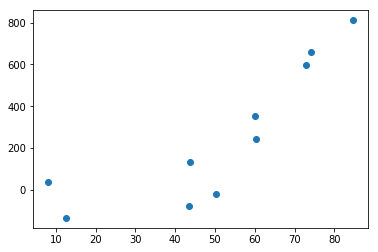

In [6]:
#sd = np.random.choice(range(9999))
np.random.seed(3383)
#print(sd)

n = 10
x = np.random.uniform(0,100,n)
y = 0.002 * x**3 - 2.7 * x + np.random.normal(0,100,n)

X = x.reshape(n,1) #reshape to 10rows and 1 column

plt.close()
plt.scatter(X,y)
plt.show()

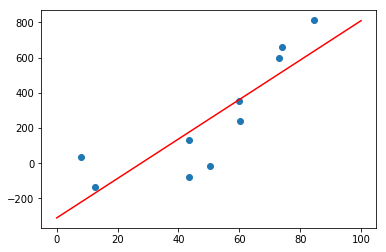

In [7]:
lin_mod = LinearRegression()
lin_mod.fit(X,y)

ticks = np.linspace(0,100,100) #creates partition from 0-100 with 100 tickmarks
ticks2 = np.arange(0,100,0.1)#creates partition from 0-100 with tickmarks .1 distance apart
y_pred = lin_mod.predict(ticks.reshape(100,1))

plt.close()
plt.scatter(X,y)
plt.plot(ticks, y_pred, c='r')
plt.show()

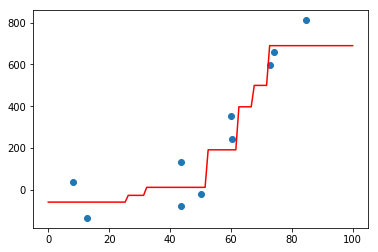

In [10]:
knn_mod = KNeighborsRegressor(3)
knn_mod.fit(X,y)

ticks = np.linspace(0,100,100) #creates partition from 0-100 with 100 tickmarks
y_pred = knn_mod.predict(ticks.reshape(100,1))

plt.close()
plt.scatter(X,y)
plt.plot(ticks, y_pred, c='r')
plt.show()

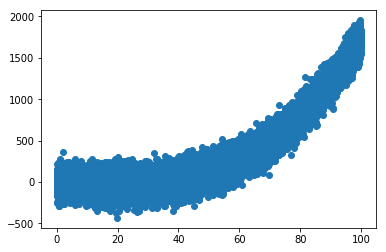

In [11]:
#sd = np.random.choice(range(9999))
np.random.seed(3383)
#print(sd)

n = 20000
x = np.random.uniform(0,100,n)
y = 0.002 * x**3 - 2.7 * x + np.random.normal(0,100,n)

X = x.reshape(n,1) #reshape to 10rows and 1 column

plt.close()
plt.scatter(X,y)
plt.show()

In [12]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X,y,test_size=0.2, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_holdout,y_holdout,test_size=0.5, random_state=1)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(16000,)
(2000,)
(2000,)


Training r2: 0.755253977456
Testing r2: 0.764037477068


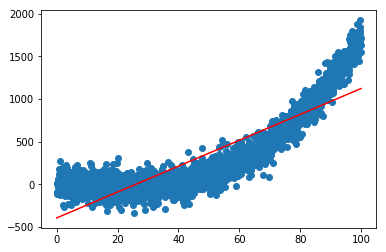

In [13]:
lin_mod = LinearRegression()
lin_mod.fit(X_train,y_train)

print("Training r2:", lin_mod.score(X_train, y_train))
print("Testing r2:", lin_mod.score(X_test, y_test))

ticks = np.linspace(0,100,100) #creates partition from 0-100 with 100 tickmarks
y_pred = lin_mod.predict(ticks.reshape(100,1))

plt.close()
plt.scatter(X_test,y_test)
plt.plot(ticks, y_pred, c='r')
plt.show()

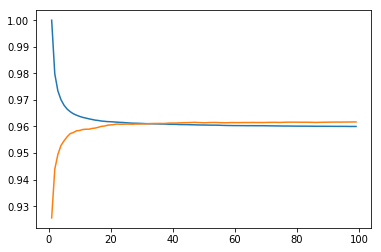

In [20]:
train_r2 = []
val_r2 = []

rng = range(1,100)

for K in rng:
    temp_mod = KNeighborsRegressor(K)
    temp_mod.fit(X_train, y_train)
    train_r2.append(temp_mod.score(X_train,y_train))
    val_r2.append(temp_mod.score(X_val,y_val))
    
plt.close()
plt.plot(rng,train_r2)
plt.plot(rng,val_r2)
plt.show()

Training r2: 0.961149815384
Testing r2: 0.957487234128


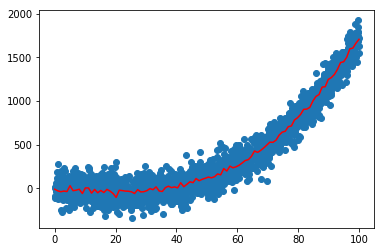

In [19]:
knn_mod = KNeighborsRegressor(30)
knn_mod.fit(X_train,y_train)

print("Training r2:", knn_mod.score(X_train, y_train))
print("Testing r2:", knn_mod.score(X_test, y_test))

ticks = np.linspace(0,100,100) #creates partition from 0-100 with 100 tickmarks
y_pred = knn_mod.predict(ticks.reshape(100,1))

plt.close()
plt.scatter(X_test,y_test)
plt.plot(ticks, y_pred, c='r')
plt.show()